# Input
After already having experimented with both Linear (me) and Binary Logistic Regression (Oscar), we decided to look into Multiclass Logistic Regression. This would allow us to have more distinction in the user scores, other than "good" and "bad". 

# Multiclass logistic regression model on Yen
Sources: 

https://realpython.com/logistic-regression-python/#logistic-regression-overview

https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

In [2]:
# Importing libraries 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from ml import *

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [3]:
# Splitting function from Oscar

def split_classes(n_classes = 3):
    class_labels = []
    
    # Create sorted list of unique values in df['User score']
    current_classes = np.sort(df['User score'].unique()) 
    
    # Split this array in n_classes of same size
    split = np.array_split(current_classes, n_classes) 
    
    for row in df.iterrows(): # Iterate over every row in the dataframe
        for label, class_ranges in enumerate(split): # Iterate over every sub array in split
            if(row[1]['User score'] in class_ranges): # If user score for row is in sub array
                class_labels.append(label) # Append class label to list
    return class_labels # Return list with class labels


# Create df with classes

df = pd.read_csv('/datc/nano/notebooks/Target variable & Features (V3).csv', index_col = 0)
df['Class'] = split_classes()


# Creating dataframe with only yen values

df_yen = df[df['Threshold method'] =='yen']

print('Class 0: ', df_yen[df_yen['Class']==0]['User score'].count(), ' records')
print('Class 1: ', df_yen[df_yen['Class']==1]['User score'].count(), ' records')
print('Class 2: ', df_yen[df_yen['Class']==2]['User score'].count(), ' records')
print('Class 3: ', df_yen[df_yen['Class']==3]['User score'].count(), ' records')

df_yen.head()

Class 0:  25  records
Class 1:  11  records
Class 2:  22  records
Class 3:  0  records


,Threshold method,Threshold: area spread,Threshold: border,Threshold: count,Threshold: fill,Threshold: intensity,Threshold: separation,User score,Class
Id,,,,,,,,,
5f11480a2d99b96663b97fdb,yen,0.265214,1.866963,13.192785,0.215541,1.711409,0.106493,9,2
5f15419a79e27502789bbbd1,yen,0.154306,5.648380,0.010033,0.184900,4.396552,0.355659,4,0
5f27c1cced3aa3f0c260b246,yen,0.012426,1.814439,2.246626,0.184488,1.734694,0.139754,1,0
5f30f7b9ed3aa3f0c260b563,yen,0.408562,4.563709,0.019553,0.220224,2.833333,0.162283,2,0
5f30fafded3aa3f0c260b6bc,yen,0.035861,2.068226,0.671646,0.160934,1.902985,0.130774,4,0


In [4]:
# Dividing into training and validation data

x = df_yen[['Threshold: separation', 'Threshold: intensity', 'Threshold: count']]
y = df_yen[['Class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print(y_test.value_counts())

Class
2        4
1        4
0        4
dtype: int64


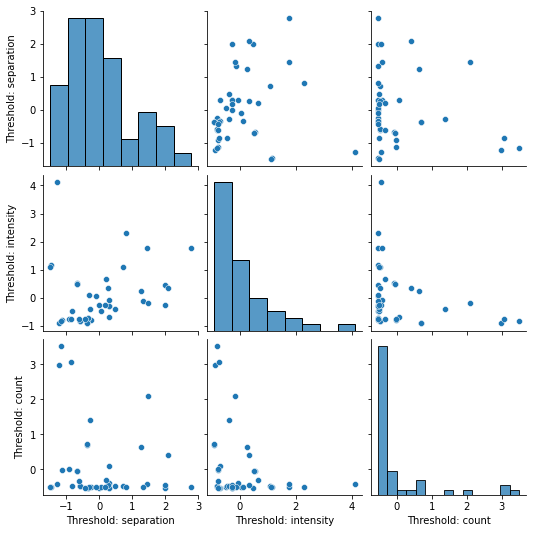

In [5]:
# Normalizing training data

scaler = StandardScaler()
x_train_array = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_array, index=x_train.index, columns=x_train.columns)

sns.pairplot(x_train)

In [6]:
# Training model

model = LogisticRegression(multi_class='auto', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

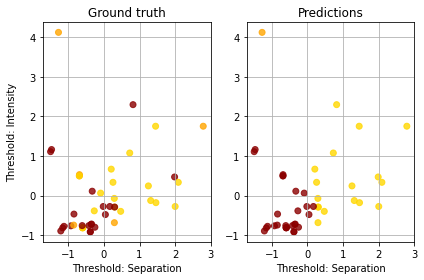

In [7]:
# Comparison visualization

colors = ['darkred','red','orange','gold']

plt.subplot(1,2,1)
plt.scatter(x_train['Threshold: separation'], x_train['Threshold: intensity'], 
            c=y_train['Class'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.8)

plt.xlabel('Threshold: Separation')
plt.ylabel('Threshold: Intensity')
plt.title('Ground truth')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(x_train['Threshold: separation'], x_train['Threshold: intensity'], 
            c=model.predict(x_train), cmap=matplotlib.colors.ListedColormap(colors), alpha=0.8)

plt.xlabel('Threshold: Separation')
plt.title('Predictions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Evaluation

score_ = model.score(x_train, y_train)
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred, zero_division=True)

print('Score: ', score_)
print(report)

Score:  0.6739130434782609
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        21
           1       1.00      0.14      0.25         7
           2       0.71      0.67      0.69        18

    accuracy                           0.67        46
   macro avg       0.78      0.56      0.56        46
weighted avg       0.72      0.67      0.64        46



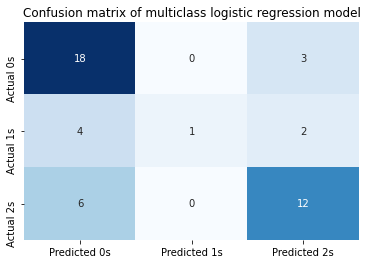

In [12]:
# Confusion matrix 

x_ticks_labels = ['Predicted 0s', 'Predicted 1s', 'Predicted 2s'] 
y_ticks_labels = ['Actual 0s', 'Actual 1s', 'Actual 2s']
sns.heatmap(conf_m, xticklabels=x_ticks_labels, yticklabels=y_ticks_labels, cmap='Blues', annot=True, cbar=False)

plt.title('Confusion matrix of multiclass logistic regression model')
plt.show()

In [10]:
# Compare predicted labels and correct labels in test set
x_test = scaler.transform(x_test)

compare_test = y_test.copy()
compare_test['Predicted Class'] = model.predict(x_test)

compare_test

,Class,Predicted Class
Id,,
5f491885298cf94b214e8f40,0,0
5f4caa47298cf94b214e9991,1,2
5f491c1d298cf94b214e90a4,0,2
5f4cb652298cf94b214ea0a8,1,2
5f4cb886298cf94b214ea3ca,2,2
5f4629d78d62faf2c4d4e268,0,2
5f4caa60298cf94b214e99a8,2,0
5f4911a5298cf94b214e8967,2,2
5f48ee847495efe38e28c50b,1,2


# Output

Multiclass Logistic Regression could be very useful as it is applicable to our dataset and the problem we want to solve. However, in this file I have only focused on some selected features, therefore I decided to look into the features further and compare them directly. Anyway, the results are not extremely promising, but we decided to directly compare this model with other models in our experiment.